In [4]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


##### ANN cours
https://youtu.be/iqQgED9vV7k?list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO

## 1) Load Data

In [13]:
# data set images minst
(X_train, Y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(X_train)

60000

In [15]:
len(X_test)

10000

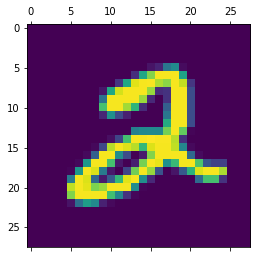

In [20]:
#  Dispaly image (bumber two)
# The X_train contien number (matrix of number between 0 and 255)
plt.matshow(X_train[5])

In [25]:
print(X_train[5])
print(X_train[5].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [44]:
# Y_train is the output of the image or the label
Y_train[5]

2

In [45]:
# output of the first five sample
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## 2) Application the flattening step

In [46]:
# Reshape the images to one dimention (60000, 28*28)
X_train.shape

(60000, 28, 28)

In [49]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

# test shape
X_train_flattened.shape

(60000, 784)

## 3) create a simple ANN (one input, one output) 

In [52]:
# create a ANN model with 10 output (number 0 to 9), input 784, activation function sigmoid
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

# compiler le model 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# train model
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 665us/step - loss: 16.9500 - accuracy: 0.7761
Epoch 2/5
1875/1875 [==============================] - 1s 655us/step - loss: 6.1162 - accuracy: 0.8775
Epoch 3/5
1875/1875 [==============================] - 1s 663us/step - loss: 5.6911 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 1s 660us/step - loss: 5.5258 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 1s 664us/step - loss: 5.3474 - accuracy: 0.8875


### 3.1) Optimiasation model by scaling the data 

In [53]:
# optimisation the model by scaling the train data to (0-1)
X_train_flattened = X_train_flattened /255
X_test_flattened = X_test_flattened /255 

In [54]:
# create a ANN model with 10 output (number 0 to 9), input 784, activation function sigmoid
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

# compiler le model 
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# train model
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 618us/step - loss: 0.7317 - accuracy: 0.8084
Epoch 2/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.3109 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 1s 611us/step - loss: 0.2873 - accuracy: 0.9195
Epoch 4/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.2662 - accuracy: 0.9264


### 3.2) Evaluate modelon dataset

In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 399us/step - loss: 0.2652 - accuracy: 0.9258


[0.2652156352996826, 0.9258000254631042]

In [59]:
# Verified the prediction of each neuron output
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.7139465e-02, 2.3301337e-07, 5.6396723e-02, 9.5404607e-01,
       1.5887320e-03, 7.8646332e-02, 1.7844955e-06, 9.9986351e-01,
       9.8614842e-02, 6.9083440e-01], dtype=float32)

In [62]:
# Maximum of prediction value
np.argmax(y_predicted[0])

7

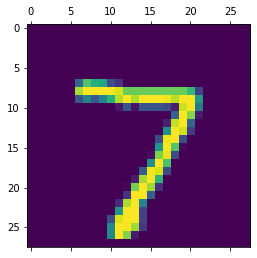

In [63]:
# Real number plt
plt.matshow(X_test[0])


In [67]:
# Matrice de confusion de notre model
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    5,    6,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  925,   18,    8,    1,   13,   11,   36,    5],
       [   4,    0,   20,  925,    0,   17,    2,   15,   20,    7],
       [   1,    1,    2,    2,  908,    0,   13,    4,   10,   41],
       [  12,    3,    2,   37,   11,  759,   19,   10,   31,    8],
       [  10,    3,    6,    1,    7,   10,  918,    2,    1,    0],
       [   1,    5,   23,    4,    4,    0,    0,  961,    3,   27],
       [   8,    7,    7,   24,    9,   22,   10,   13,  867,    7],
       [  11,    7,    1,    9,   20,    6,    0,   28,    5,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

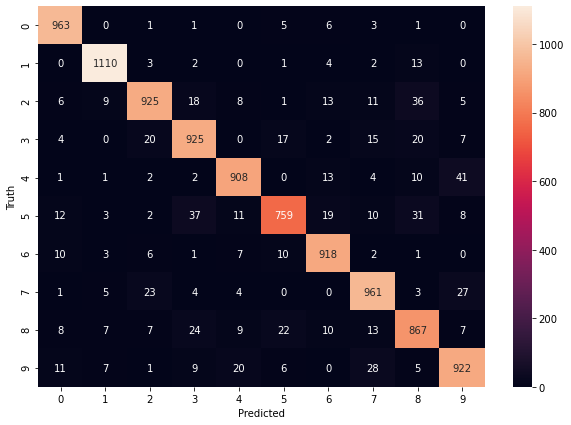

In [68]:
# Show the Matrix in heatmap

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 3.3) Create a headen layer for ANN

In [81]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # headeb layers with 100 Neuron and Relu fct
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 729us/step - loss: 0.4583 - accuracy: 0.8701
Epoch 2/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.1351 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 1s 742us/step - loss: 0.0870 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 1s 735us/step - loss: 0.0653 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 1s 734us/step - loss: 0.0492 - accuracy: 0.9851


In [71]:
# Evalute the performance on test set
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 463us/step - loss: 0.0789 - accuracy: 0.9773


[0.07892601937055588, 0.9772999882698059]

Text(69.0, 0.5, 'Truth')

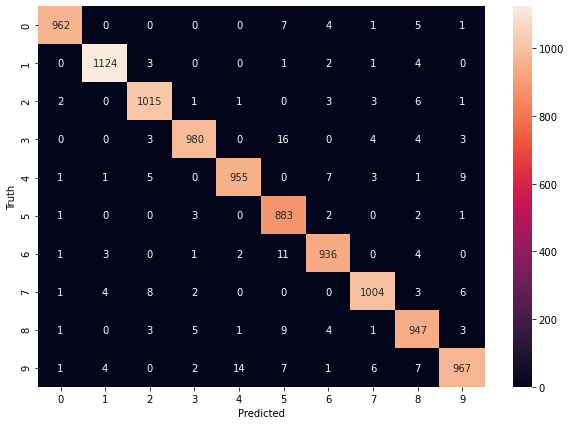

In [72]:
# Confusion Matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 3.4) Use a flatten of Keras 

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), # headeb layers with 100 Neuron and Relu fct
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 802us/step - loss: 6.3996 - accuracy: 0.7961
Epoch 2/5
1875/1875 [==============================] - 1s 800us/step - loss: 0.4523 - accuracy: 0.8899
Epoch 3/5
1875/1875 [==============================] - 1s 799us/step - loss: 0.3106 - accuracy: 0.9171
Epoch 4/5
1875/1875 [==============================] - 1s 797us/step - loss: 0.2578 - accuracy: 0.9320
Epoch 5/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.2446 - accuracy: 0.9374


In [80]:
# 3 Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, activation='relu'), # headen layers with 100 Neuron and Relu fct
    keras.layers.Dense(100, activation='relu'), # headen layers with 100 Neuron and Relu fct
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 4.5413 - accuracy: 0.7628
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3381 - accuracy: 0.9172
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2227 - accuracy: 0.9427
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1707 - accuracy: 0.9560
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1404 - accuracy: 0.9643
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1187 - accuracy: 0.9709
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1045 - accuracy: 0.9740
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0892 - accuracy: 0.9768
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9773
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.081